In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam, Nadam, Adagrad
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("sensor-nodes.csv")
df.head()

,Node_ID,Timestamp,IP_Address,Packet_Rate,Packet_Drop_Rate,Packet_Duplication_Rate,Data_Throughput,Signal_Strength,SNR,Battery_Level,...,Number_of_Neighbors,Route_Request_Frequency,Route_Reply_Frequency,Data_Transmission_Frequency,Data_Reception_Frequency,Error_Rate,CPU_Usage,Memory_Usage,Bandwidth,Is_Malicious
0,1,01-02-23 0:00,192.168.119.138,52.018229,2.727317,0.955687,130.967180,-52.059232,23.974265,82.982598,...,3,11.323044,11.458199,20.670539,14.385439,0.109146,26.376693,29.186341,76.811986,0
1,2,01-02-23 0:01,192.168.225.56,59.504648,1.435058,1.228460,82.634358,-57.754723,22.572052,66.734853,...,6,8.277362,8.832980,15.555122,14.316681,0.077136,34.963429,34.203177,112.495912,0
2,3,01-02-23 0:02,192.168.187.210,34.118204,1.320905,1.015245,61.649928,-52.399037,15.667076,74.593605,...,5,8.196374,8.330227,19.470748,11.792084,0.052993,48.934585,31.682662,117.526109,0
3,4,01-02-23 0:03,192.168.78.245,39.643055,1.988791,0.784562,69.704181,-53.727443,20.286962,76.710564,...,6,10.683766,6.525032,16.228955,8.895409,0.087810,47.045600,37.470027,123.058913,0
4,5,01-02-23 0:04,192.168.233.229,40.212679,1.005121,1.412193,123.445612,-49.696620,24.318538,84.477890,...,7,11.176823,10.617432,12.257423,10.168739,0.068823,33.394354,26.582970,71.696911,0


In [3]:
X = df.drop(columns=["Node_ID", "Timestamp", "IP_Address", "Is_Malicious"])
y = df["Is_Malicious"]

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [6]:
X_train_reshaped = X_train.reshape(-1, 1, X_train.shape[1])
X_val_reshaped = X_val.reshape(-1, 1, X_val.shape[1])
X_test_reshaped = X_test.reshape(-1, 1, X_test.shape[1])

In [7]:
model = Sequential()
model.add(GRU(units=64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))

In [8]:
adam_optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=adam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

adam_history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val))

Epoch 1/10
219/219 [==============================] - 2s 3ms/step - loss: 0.2500 - accuracy: 0.9457 - val_loss: 0.0414 - val_accuracy: 1.0000
Epoch 2/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0177 - accuracy: 1.0000 - val_loss: 0.0079 - val_accuracy: 1.0000
Epoch 3/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 4/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 5/10
219/219 [==============================] - 0s 2ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 6/10
219/219 [==============================] - 0s 2ms/step - loss: 8.8229e-04 - accuracy: 1.0000 - val_loss: 7.5769e-04 - val_accuracy: 1.0000
Epoch 7/10
219/219 [==============================] - 0s 2ms/step - loss: 6.1624e-04 - accuracy: 1.0000 - val_loss: 5.4849e-04 - val_accurac

In [9]:
nadam_optimizer = Nadam(learning_rate=0.001)

model.compile(optimizer=nadam_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

nadam_history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val))

Epoch 1/10
219/219 [==============================] - 2s 3ms/step - loss: 7.1786e-05 - accuracy: 1.0000 - val_loss: 2.8624e-05 - val_accuracy: 1.0000
Epoch 2/10
219/219 [==============================] - 0s 2ms/step - loss: 1.3732e-05 - accuracy: 1.0000 - val_loss: 7.7800e-06 - val_accuracy: 1.0000
Epoch 3/10
219/219 [==============================] - 0s 2ms/step - loss: 6.5116e-06 - accuracy: 1.0000 - val_loss: 5.2143e-06 - val_accuracy: 1.0000
Epoch 4/10
219/219 [==============================] - 0s 2ms/step - loss: 3.7960e-06 - accuracy: 1.0000 - val_loss: 3.9735e-06 - val_accuracy: 1.0000
Epoch 5/10
219/219 [==============================] - 0s 2ms/step - loss: 2.4388e-06 - accuracy: 1.0000 - val_loss: 2.6907e-06 - val_accuracy: 1.0000
Epoch 6/10
219/219 [==============================] - 1s 3ms/step - loss: 1.7617e-06 - accuracy: 1.0000 - val_loss: 2.0704e-06 - val_accuracy: 1.0000
Epoch 7/10
219/219 [==============================] - 1s 3ms/step - loss: 1.3486e-06 - accuracy: 1.0

In [10]:
adagrad_optimizer = Adagrad(learning_rate=0.001)

model.compile(optimizer=adagrad_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

adagrad_history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_val_reshaped, y_val))

Epoch 1/10
219/219 [==============================] - 2s 4ms/step - loss: 5.7866e-07 - accuracy: 1.0000 - val_loss: 9.0692e-07 - val_accuracy: 1.0000
Epoch 2/10
219/219 [==============================] - 1s 3ms/step - loss: 5.7866e-07 - accuracy: 1.0000 - val_loss: 9.0693e-07 - val_accuracy: 1.0000
Epoch 3/10
219/219 [==============================] - 1s 2ms/step - loss: 5.7866e-07 - accuracy: 1.0000 - val_loss: 9.0694e-07 - val_accuracy: 1.0000
Epoch 4/10
219/219 [==============================] - 0s 2ms/step - loss: 5.7866e-07 - accuracy: 1.0000 - val_loss: 9.0694e-07 - val_accuracy: 1.0000
Epoch 5/10
219/219 [==============================] - 0s 2ms/step - loss: 5.7866e-07 - accuracy: 1.0000 - val_loss: 9.0695e-07 - val_accuracy: 1.0000
Epoch 6/10
219/219 [==============================] - 0s 2ms/step - loss: 5.7866e-07 - accuracy: 1.0000 - val_loss: 9.0696e-07 - val_accuracy: 1.0000
Epoch 7/10
219/219 [==============================] - 0s 2ms/step - loss: 5.7866e-07 - accuracy: 1.0

In [11]:
loss, accuracy = model.evaluate(X_test_reshaped, y_test)
print("Test loss: ", loss)
print("Test accuracy: ", accuracy)

47/47 [==============================] - 0s 2ms/step - loss: 6.3387e-05 - accuracy: 1.0000
Test loss:  6.338729872368276e-05
Test accuracy:  1.0


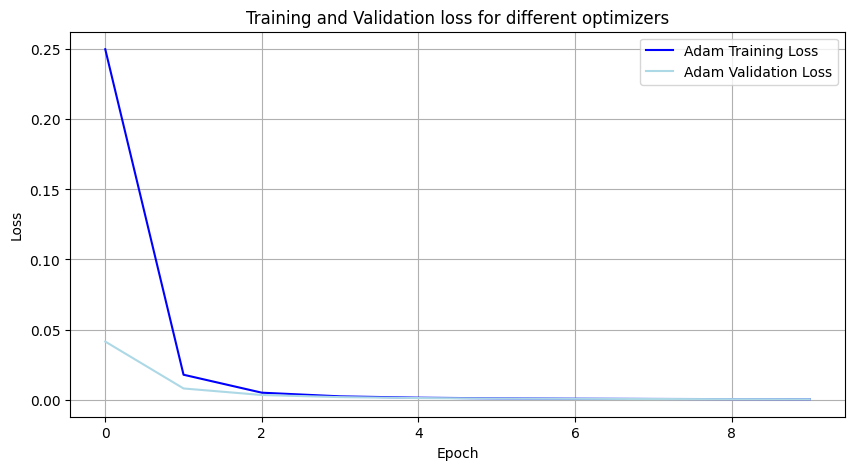

In [12]:
plt.figure(figsize=(10, 5))

plt.plot(adam_history.history['loss'], label="Adam Training Loss", color="blue")
plt.plot(adam_history.history['val_loss'], label="Adam Validation Loss", color="lightblue")

plt.title("Training and Validation loss for different optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

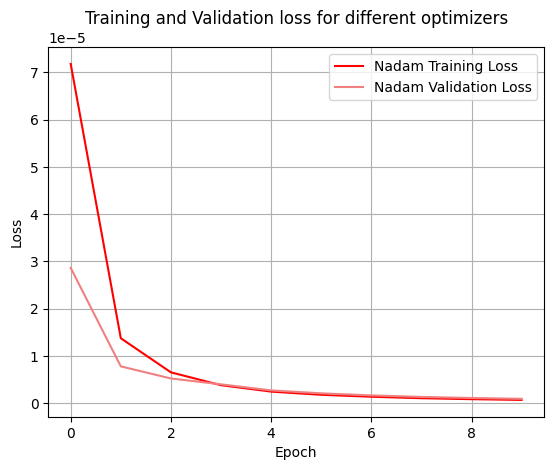

In [13]:
plt.plot(nadam_history.history['loss'], label="Nadam Training Loss", color="red")
plt.plot(nadam_history.history['val_loss'], label="Nadam Validation Loss", color="lightcoral")

plt.title("Training and Validation loss for different optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

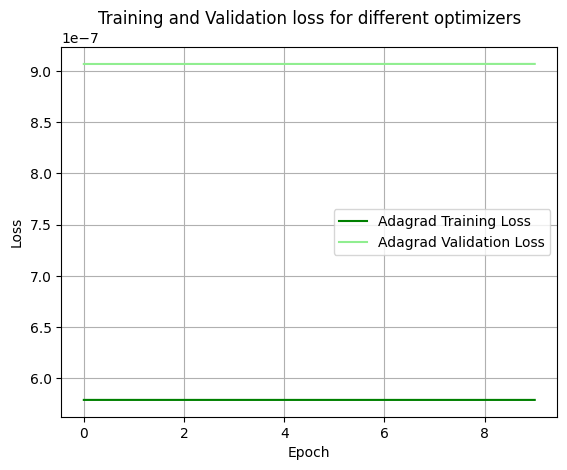

In [14]:
plt.plot(adagrad_history.history['loss'], label="Adagrad Training Loss", color="green")
plt.plot(adagrad_history.history['val_loss'], label="Adagrad Validation Loss", color="lightgreen")

plt.title("Training and Validation loss for different optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

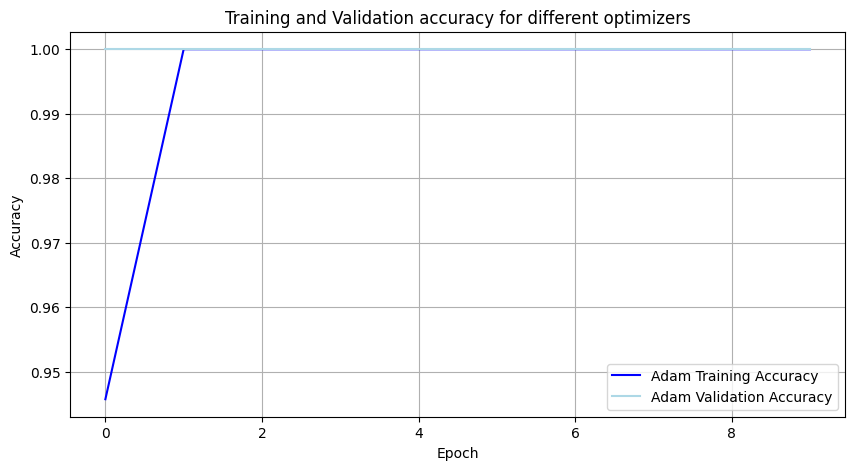

In [15]:
plt.figure(figsize=(10, 5))

plt.plot(adam_history.history['accuracy'], label="Adam Training Accuracy", color="blue")
plt.plot(adam_history.history['val_accuracy'], label="Adam Validation Accuracy", color="lightblue")

plt.title("Training and Validation accuracy for different optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

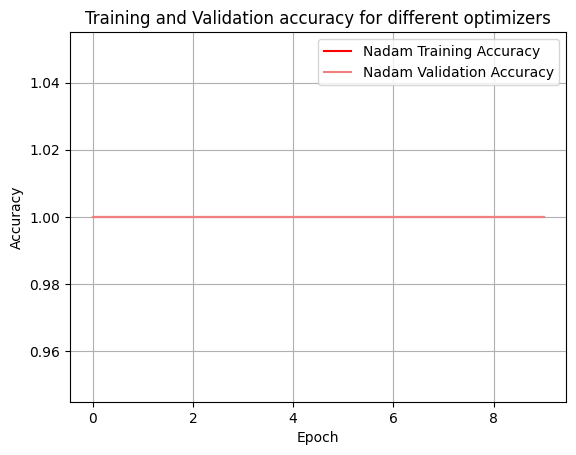

In [16]:
plt.plot(nadam_history.history['accuracy'], label="Nadam Training Accuracy", color="red")
plt.plot(nadam_history.history['val_accuracy'], label="Nadam Validation Accuracy", color="lightcoral")

plt.title("Training and Validation accuracy for different optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

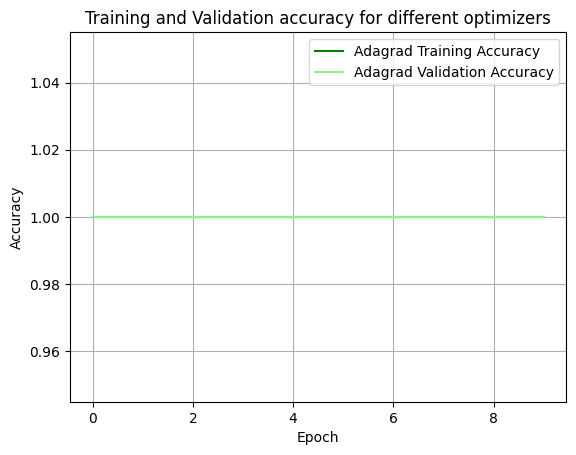

In [17]:
plt.plot(adagrad_history.history['accuracy'], label="Adagrad Training Accuracy", color="green")
plt.plot(adagrad_history.history['val_accuracy'], label="Adagrad Validation Accuracy", color="lightgreen")

plt.title("Training and Validation accuracy for different optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

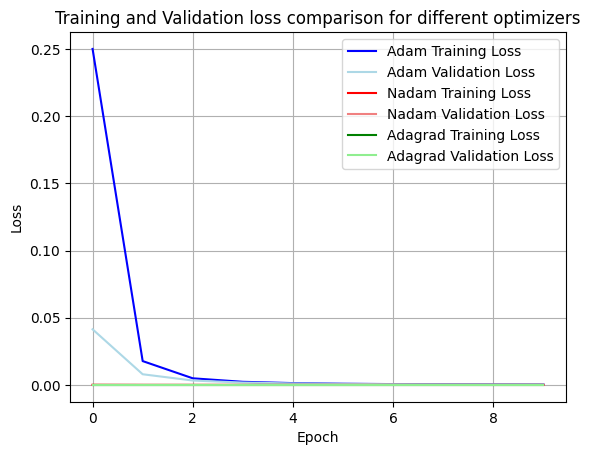

In [18]:
plt.plot(adam_history.history['loss'], label="Adam Training Loss", color="blue")
plt.plot(adam_history.history['val_loss'], label="Adam Validation Loss", color="lightblue")

plt.plot(nadam_history.history['loss'], label="Nadam Training Loss", color="red")
plt.plot(nadam_history.history['val_loss'], label="Nadam Validation Loss", color="lightcoral")

plt.plot(adagrad_history.history['loss'], label="Adagrad Training Loss", color="green")
plt.plot(adagrad_history.history['val_loss'], label="Adagrad Validation Loss", color="lightgreen")

plt.title("Training and Validation loss comparison for different optimizers")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

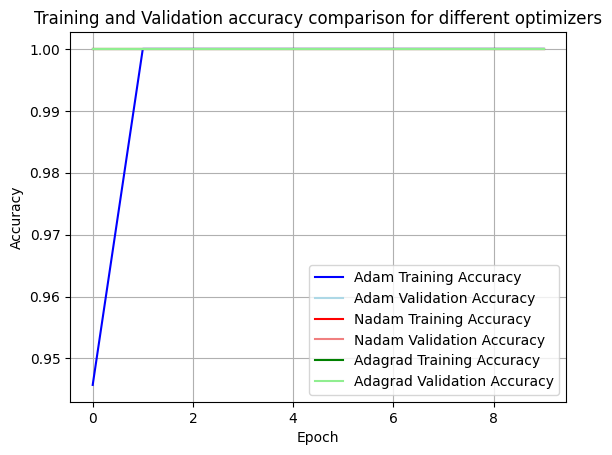

In [19]:
plt.plot(adam_history.history['accuracy'], label="Adam Training Accuracy", color="blue")
plt.plot(adam_history.history['val_accuracy'], label="Adam Validation Accuracy", color="lightblue")

plt.plot(nadam_history.history['accuracy'], label="Nadam Training Accuracy", color="red")
plt.plot(nadam_history.history['val_accuracy'], label="Nadam Validation Accuracy", color="lightcoral")

plt.plot(adagrad_history.history['accuracy'], label="Adagrad Training Accuracy", color="green")
plt.plot(adagrad_history.history['val_accuracy'], label="Adagrad Validation Accuracy", color="lightgreen")

plt.title("Training and Validation accuracy comparison for different optimizers")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()